## Analysis of Data Stored

In [16]:
import pandas as pd
from pymongo import MongoClient
from dotenv import load_dotenv
import matplotlib.pyplot as plt


#### Import data stored in the dataset

- Let's connect to the Db in order to extract Data 

In [61]:

# Load environment variables from .env file
load_dotenv()
mongo='127.0.0.1'

try:
    # Connect to MongoDB
    myclient = MongoClient(
                        "mongodb://"+mongo+":27017/",  
                        username='admin',
                        password='admin') #Mongo URI format
    db=myclient['Production_db']
    print("Connected to MongoDB successfully!")
except Exception as e:
    print("An error occurred while connecting to MongoDB:", e)
    
    


Connected to MongoDB successfully!


## acess the data augmented with LLM to clean it 

In [62]:
#import
posts_registered=[]
query=db.reddit_llm.find({},{'_id':0})
posts_registered=list(query)    
posts_registered_df=pd.DataFrame(posts_registered)
posts_registered_df.head()

,id,created_at,Gender,Self-Diagnosis,Self-Medication,Sentiment,Source
0,1et3kj0,2024-08-15 19:06:49,null,1,0,Positive,Reddit
1,1gk5ftv,2024-11-05 12:24:31,null,0,0,Neutral,Reddit
2,1f0k9en,2024-08-25 00:48:44,null,0,0,Positive,Reddit
3,1g7tbb2,2024-10-20 07:25:55,female,1,0,Neutral,Reddit
4,1dy8uqs,2024-07-08 13:24:47,null,1,0,Positive,Reddit


Some useful fucntions for analysis

In [63]:
import datetime
def get_month(date):
    return date.month
def get_year(date):
    return date.year


In [64]:
posts_registered_df['month']=posts_registered_df['created_at'].apply(get_month)
posts_registered_df['year']=posts_registered_df['created_at'].apply(get_year)   

### Get the number of posts per year

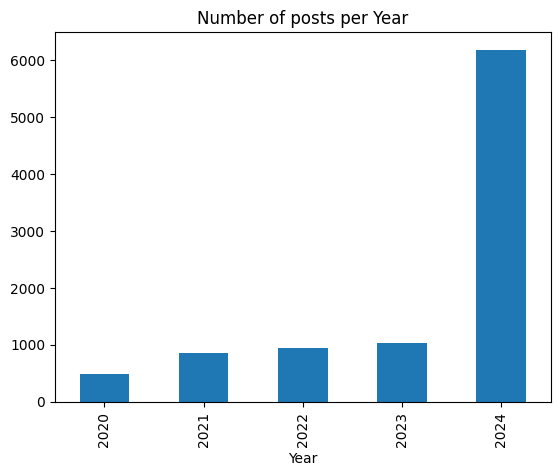

In [65]:
plt.Figure(figsize=(30,35))
posts_registered_df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of posts per Year')
plt.xlabel('Year')
plt.show()

### Get the number of posts per month

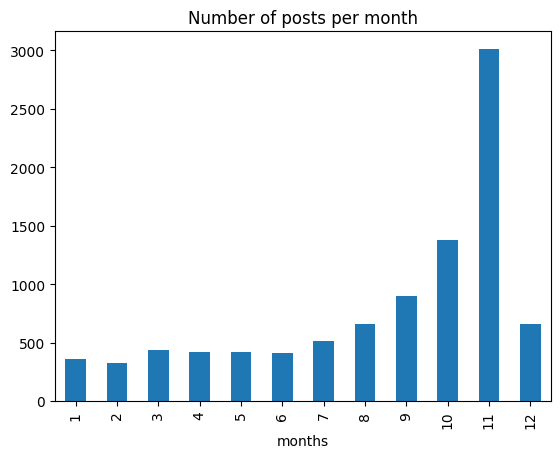

In [66]:
plt.Figure(figsize=(30,35))
posts_registered_df['month'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of posts per month')
plt.xlabel('months')
plt.show()

### acess the demographic of people making the posts through the gender

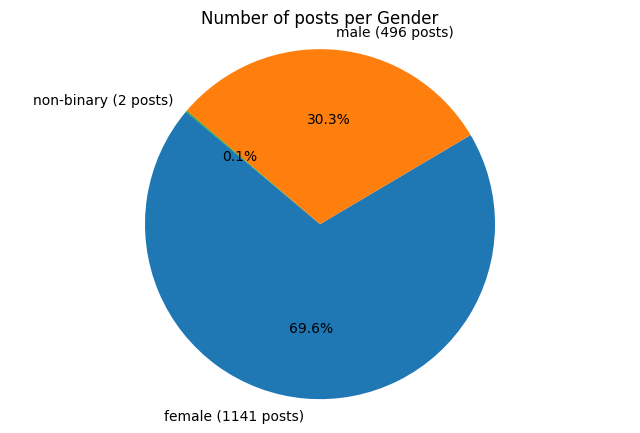

In [76]:
# Assuming 'gender_df' is already defined
gender_df = posts_registered_df[posts_registered_df['Gender'] != 'null']

# Count the number of posts per gender
gender_counts = gender_df['Gender'].value_counts()

# Create the labels, combining the gender with the post count
labels = [f"{label} ({value} posts)" for label, value in zip(gender_counts.index, gender_counts)]

# Plot the pie chart
plt.figure(figsize=(8, 5))
plt.title('Number of posts per Gender')

# Display labels with percentages
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=140)

# Make the chart round
plt.axis('equal')
plt.show()
